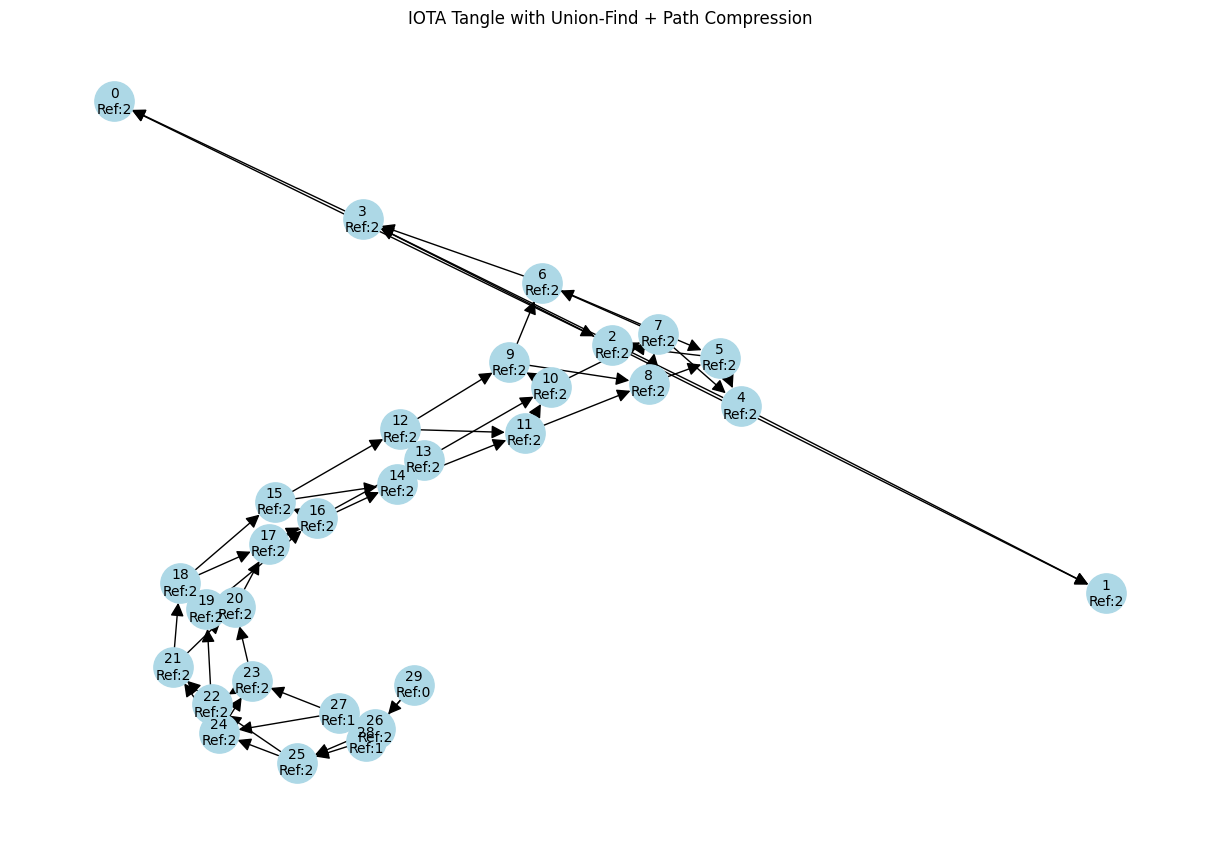

In [2]:
import networkx as nx
import matplotlib.pyplot as plt


# 模擬一個簡單的 Tangle 結構，並使用 Union-Find with path compression 優化確認路徑

class UnionFind:
    def __init__(self, n):
        self.parent = list(range(n))
        self.size = [1] * n
        self.ref_count = [0] * n  # 每個節點被引用的次數
    
    def find(self, x):
        # 路徑壓縮
        if self.parent[x] != x:
            self.parent[x] = self.find(self.parent[x])
        return self.parent[x]
    
    def union(self, x, y):
        # 合併集合，權重小的併入權重大的
        root_x = self.find(x)
        root_y = self.find(y)
        if root_x == root_y:
            return
        if self.size[root_x] < self.size[root_y]:
            self.parent[root_x] = root_y
            self.size[root_y] += self.size[root_x]
        else:
            self.parent[root_y] = root_x
            self.size[root_x] += self.size[root_y]
    
    def add_reference(self, x):
        self.ref_count[x] += 1

# 初始化 DAG 和 Union-Find
G = nx.DiGraph()
n = 30  # 模擬 30 筆交易
uf = UnionFind(n)

# 建立 Tangle：每筆交易引用兩個 tips（低引用次數的節點）
for i in range(n):
    G.add_node(i)
    # 隨機選兩個引用次數最少的節點（模擬冷節點優先）
    if i >= 2:
        tips = sorted(range(i), key=lambda x: uf.ref_count[x])[:2]
        for tip in tips:
            G.add_edge(i, tip)
            uf.union(i, tip)
            uf.add_reference(tip)

# 繪圖用：標記每個節點的被引用次數
labels = {i: f"{i}\nRef:{uf.ref_count[i]}" for i in G.nodes}

# 畫出 DAG 結構
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, labels=labels, node_color='lightblue', node_size=800, font_size=10, arrowsize=20)
plt.title("IOTA Tangle with Union-Find + Path Compression")
plt.show()
